In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
import warnings
warnings.filterwarnings("ignore")
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
#from google.colab import drive

2024-02-02 10:51:40.542087: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Num GPUs Available:  1


In [2]:
#drive.mount('/content/drive')

In [3]:
image_dir = Path('/home/mishra/Documents/Ayesha/Ayesha 2/Multi Task Learning/Excel_Reviewd/800X800 Patches meltpool.csv')

In [4]:
# filepaths = pd.Series(list(image_dir.glob(r'**/*.jpg')), name='Image').astype(str)
# SDAS = pd.Series(filepaths.apply(lambda x: os.path.split(os.path.split(x)[0])[1]), name='SDAS').astype(np.int)

# images = pd.concat([filepaths, SDAS], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [5]:
# filepaths = pd.Series(list(image_dir.glob(r'**/*.jpg')), name='Image').astype(str)
# # Extract the "Width" and "Depth" columns
# width = pd.Series(df['Width']).astype(np.int)
# depth = pd.Series(df['Depth']).astype(np.int)

# # Concatenate the filepaths, width, and depth into a new DataFrame
# images = pd.concat([filepaths, width, depth], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)


In [6]:
import pandas as pd
import numpy as np
import os

# Assuming you have the necessary libraries imported and filepaths defined

# Read the CSV file into a DataFrame
df = pd.read_csv('/home/mishra/Documents/Ayesha/Ayesha 2/Multi Task Learning/Excel_Reviewd/800X800 Patches meltpool.csv')

# Extract the filepaths from the "Image" column
filepaths = pd.Series(df['Image']).astype(str)

# Extract the "Width" and "Depth" columns
width = pd.Series(df['width']).astype(np.int)
depth = pd.Series(df['depth']).astype(np.int)

# Concatenate the filepaths, width, and depth into a new DataFrame
data = pd.concat([filepaths, width, depth], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)

# Perform your regression task on the "Width" and "Depth" columns
# Modify this part according to your regression algorithm or approach

# Save the results to a new CSV file
data.to_csv('modified_csv_file.csv', index=False)

In [7]:
data.head()

,Image,width,depth
0,/home/mishra/Documents/Ayesha/Ayesha 2/FInal s...,115,39
1,/home/mishra/Documents/Ayesha/Ayesha 2/FInal s...,100,29
2,/home/mishra/Documents/Ayesha/Ayesha 2/FInal s...,113,36
3,/home/mishra/Documents/Ayesha/Ayesha 2/FInal s...,95,32
4,/home/mishra/Documents/Ayesha/Ayesha 2/FInal s...,0,0


In [8]:
data.tail()

,Image,width,depth
14251,/home/mishra/Documents/Ayesha/Ayesha 2/FInal s...,0,0
14252,/home/mishra/Documents/Ayesha/Ayesha 2/FInal s...,0,0
14253,/home/mishra/Documents/Ayesha/Ayesha 2/FInal s...,92,34
14254,/home/mishra/Documents/Ayesha/Ayesha 2/FInal s...,0,0
14255,/home/mishra/Documents/Ayesha/Ayesha 2/FInal s...,93,32


In [9]:
#image_df = images.sample(10000, random_state=1, replace = True ).reset_index(drop=True)

train_df, test_df = train_test_split(data, train_size=0.8, shuffle=True, random_state=1)

In [10]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [11]:
train_df

,Image,width,depth
14085,/home/mishra/Documents/Ayesha/Ayesha 2/FInal s...,0,0
13449,/home/mishra/Documents/Ayesha/Ayesha 2/FInal s...,314,38
13990,/home/mishra/Documents/Ayesha/Ayesha 2/FInal s...,130,39
4030,/home/mishra/Documents/Ayesha/Ayesha 2/FInal s...,314,38
4223,/home/mishra/Documents/Ayesha/Ayesha 2/FInal s...,0,0
...,...,...,...
905,/home/mishra/Documents/Ayesha/Ayesha 2/FInal s...,0,0
5192,/home/mishra/Documents/Ayesha/Ayesha 2/FInal s...,0,0
12172,/home/mishra/Documents/Ayesha/Ayesha 2/FInal s...,0,0
235,/home/mishra/Documents/Ayesha/Ayesha 2/FInal s...,0,0


In [12]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Image',
    y_col=['width', 'depth'],
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)



Found 9124 validated image filenames.


In [13]:
val_images = train_generator.flow_from_dataframe(
    
    dataframe=train_df,
    x_col='Image',
    y_col=['width', 'depth'],
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

Found 2280 validated image filenames.


In [14]:

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Image',
    y_col=['width', 'depth'],
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=False
)

Found 2852 validated image filenames.


In [15]:
# from tensorflow.keras.applications.vgg16 import VGG16
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.models import Model

In [16]:
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# for layer in base_model.layers:
#     layer.trainable = False

In [17]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Load the ResNet50 model with pre-trained weights
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

2024-02-02 10:51:45.382128: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-02 10:51:46.243616: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6453 MB memory:  -> device: 0, name: Quadro RTX 4000, pci bus id: 0000:3b:00.0, compute capability: 7.5


In [18]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(2)(x)  # Output layer for width and depth

model = Model(inputs=base_model.input, outputs=predictions)


In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [20]:
tf.keras.utils.plot_model(model, "InceptionV3.png")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [21]:
optimizers = tf.keras.optimizers.Adam(learning_rate = 0.0005)

model.compile(
    optimizer = optimizers,
    loss='mse'
)

In [22]:
history = model.fit(
    train_images,
    validation_data=val_images,
        batch_size = 32,

    epochs = 150
)


Epoch 1/150


2024-02-02 10:51:51.654237: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


286/286 [==============================] - 150s 507ms/step - loss: 1471.2570 - val_loss: 243.7504
Epoch 2/150
286/286 [==============================] - 145s 506ms/step - loss: 176.9606 - val_loss: 138.4194
Epoch 3/150
286/286 [==============================] - 145s 507ms/step - loss: 115.3546 - val_loss: 102.5842
Epoch 4/150
286/286 [==============================] - 145s 508ms/step - loss: 83.4023 - val_loss: 73.6001
Epoch 5/150
286/286 [==============================] - 145s 508ms/step - loss: 63.9818 - val_loss: 60.0320
Epoch 6/150
286/286 [==============================] - 145s 506ms/step - loss: 51.5354 - val_loss: 49.9664
Epoch 7/150
286/286 [==============================] - 144s 503ms/step - loss: 43.0036 - val_loss: 43.6495
Epoch 8/150
286/286 [==============================] - 144s 505ms/step - loss: 36.3018 - val_loss: 39.0149
Epoch 9/150
286/286 [==============================] - 145s 506ms/step - loss: 32.2260 - val_loss: 33.4145
Epoch 10/150
286/286 [====================

286/286 [==============================] - 142s 498ms/step - loss: 1.4475 - val_loss: 10.0358
Epoch 78/150
286/286 [==============================] - 143s 499ms/step - loss: 1.5018 - val_loss: 10.1442
Epoch 79/150
286/286 [==============================] - 142s 498ms/step - loss: 1.3790 - val_loss: 10.4619
Epoch 80/150
286/286 [==============================] - 143s 500ms/step - loss: 1.4190 - val_loss: 10.3215
Epoch 81/150
286/286 [==============================] - 142s 498ms/step - loss: 1.3719 - val_loss: 10.0305
Epoch 82/150
286/286 [==============================] - 143s 500ms/step - loss: 1.1573 - val_loss: 10.0640
Epoch 83/150
286/286 [==============================] - 143s 500ms/step - loss: 1.2178 - val_loss: 10.5102
Epoch 84/150
286/286 [==============================] - 142s 497ms/step - loss: 1.1651 - val_loss: 10.1703
Epoch 85/150
286/286 [==============================] - 143s 498ms/step - loss: 1.1397 - val_loss: 9.7309
Epoch 86/150
286/286 [=============================

In [23]:
model.save("mobilnet_model_regression.h5")

In [24]:
from tensorflow.keras.metrics import mean_squared_error

In [25]:
# Assuming you have the trained model: model
# Assuming you have the test_images generator

# Make predictions for test images
predictions = model.predict(test_images)

# Extract the predicted values for width and depth
predicted_width = predictions[:, 0]
predicted_depth = predictions[:, 1]

# Extract the true values for width and depth
true_width = test_images.labels[:, 0]
true_depth = test_images.labels[:, 1]

# Calculate RMSE for width and depth
rmse_width = np.sqrt(mean_squared_error(true_width, predicted_width))
rmse_depth = np.sqrt(mean_squared_error(true_depth, predicted_depth))

print("Test Width RMSE: {:.5f}".format(rmse_width))
print("Test Depth RMSE: {:.5f}".format(rmse_depth))

# Calculate R^2 score for width and depth
r2_width = r2_score(true_width, predicted_width)
r2_depth = r2_score(true_depth, predicted_depth)

print("Test Width R^2 Score: {:.5f}".format(r2_width))
print("Test Depth R^2 Score: {:.5f}".format(r2_depth))


90/90 [==============================] - 37s 402ms/step
Test Width RMSE: 4.62763
Test Depth RMSE: 0.97319
Test Width R^2 Score: 0.99716
Test Depth R^2 Score: 0.99701


In [26]:
# Create a DataFrame with true_width and predicted_width
width_df = pd.DataFrame({'True Width': true_width, 'Predicted Width': predicted_width})

# Print the DataFrame
print(width_df)

      True Width  Predicted Width
0              0         0.014221
1              0         0.196152
2            108       110.992432
3              0        -0.069896
4            100       100.078590
...          ...              ...
2847           0         0.044036
2848         249       235.302109
2849          95        96.411011
2850         314       305.328400
2851         100       100.010529

[2852 rows x 2 columns]


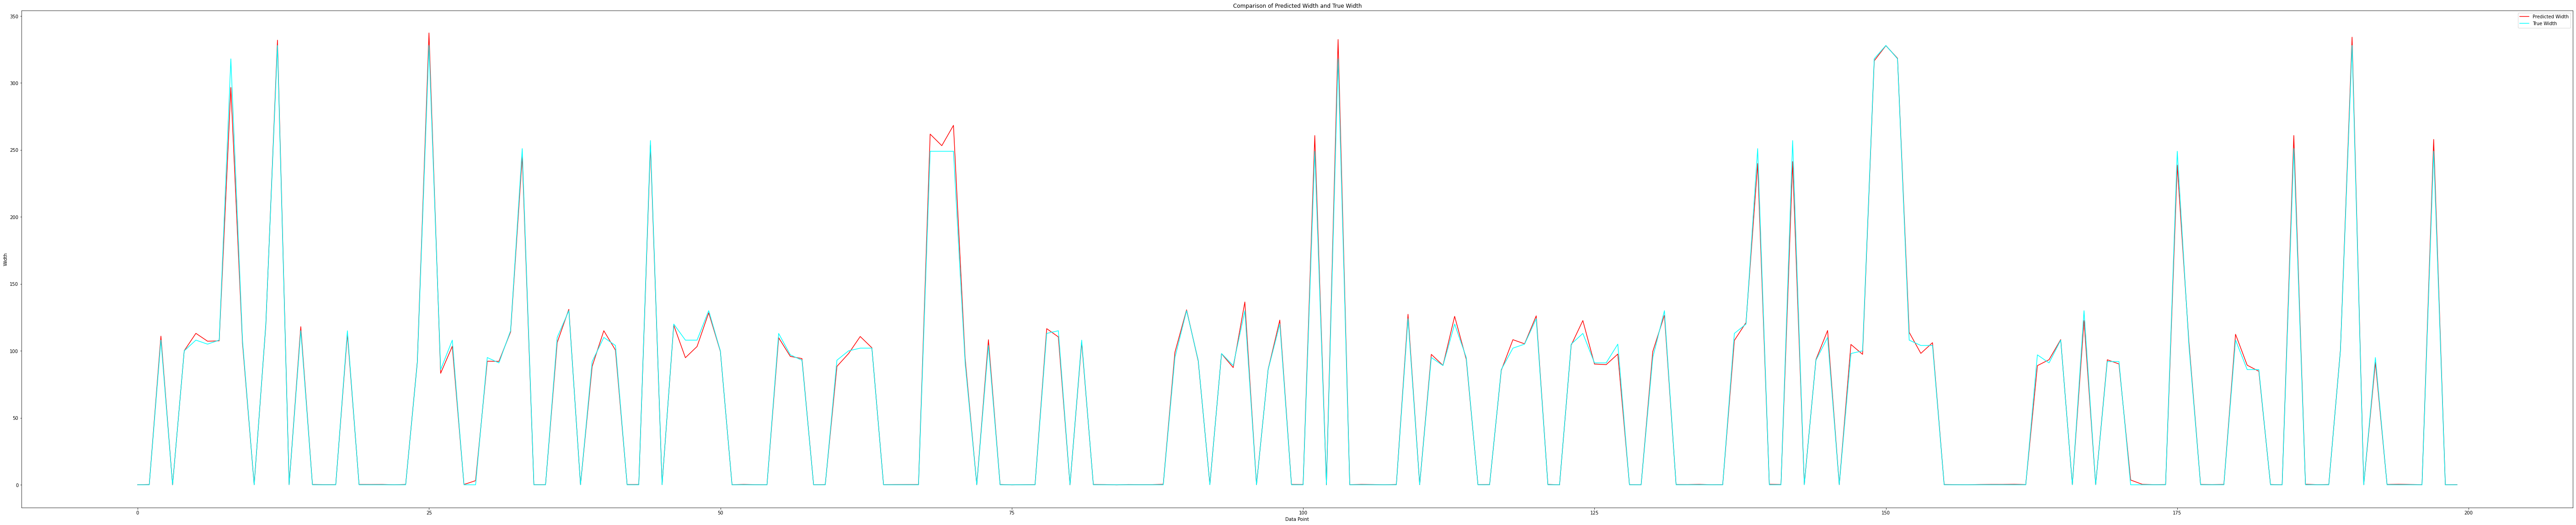

In [27]:
import matplotlib.pyplot as plt

# Define the figure size
plt.figure(figsize=(100, 20))

# Plot the predicted width with a red color and label it as 'Predicted Width'
plt.plot(predicted_width[:200], color='red', label='Predicted Width')

# Plot the true width with a cyan color and label it as 'True Width'
plt.plot(true_width[:200], color='cyan', label='True Width')

# Add labels for the x-axis and y-axis
plt.xlabel('Data Point')
plt.ylabel('Width')

# Add a title to the plot
plt.title('Comparison of Predicted Width and True Width')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

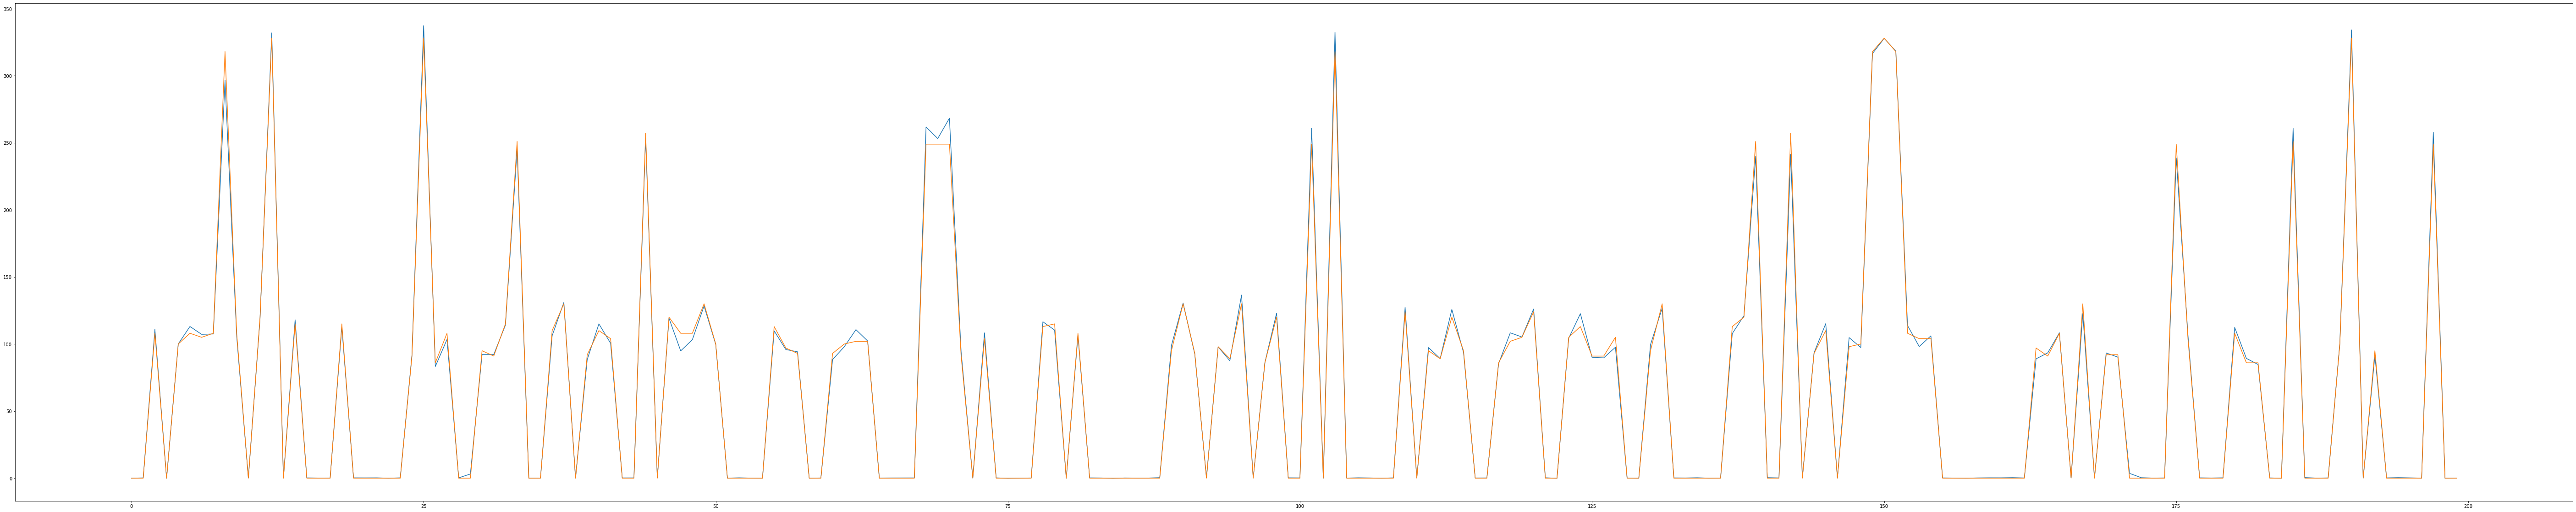

In [28]:
plt.figure(figsize=(100, 20))
plt.plot(predicted_width[:200])
plt.plot(true_width[:200])

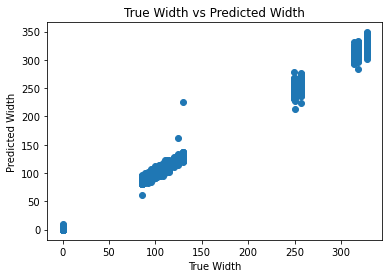

In [29]:
# Create a scatter plot of true_width and predicted_width
plt.scatter(true_width, predicted_width)
plt.xlabel('True Width')
plt.ylabel('Predicted Width')
plt.title('True Width vs Predicted Width')
plt.show()

In [30]:
# Create a DataFrame with true_width and predicted_width
depth_df = pd.DataFrame({'True Width': true_depth, 'Predicted Width': predicted_depth})

# Print the DataFrame
print(depth_df)

      True Width  Predicted Width
0              0         0.045763
1              0         0.148936
2             34        35.252541
3              0        -0.097740
4             29        29.362181
...          ...              ...
2847           0        -0.052329
2848          39        37.567158
2849          32        32.558186
2850          38        39.099617
2851          29        30.634186

[2852 rows x 2 columns]


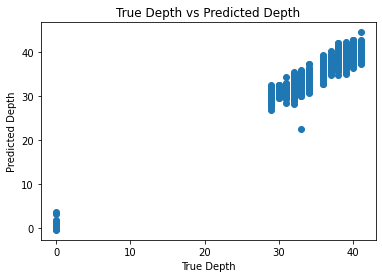

In [31]:
# Create a scatter plot of true_width and predicted_width
plt.scatter(true_depth, predicted_depth)
plt.xlabel('True Depth')
plt.ylabel('Predicted Depth')
plt.title('True Depth vs Predicted Depth')
plt.show()

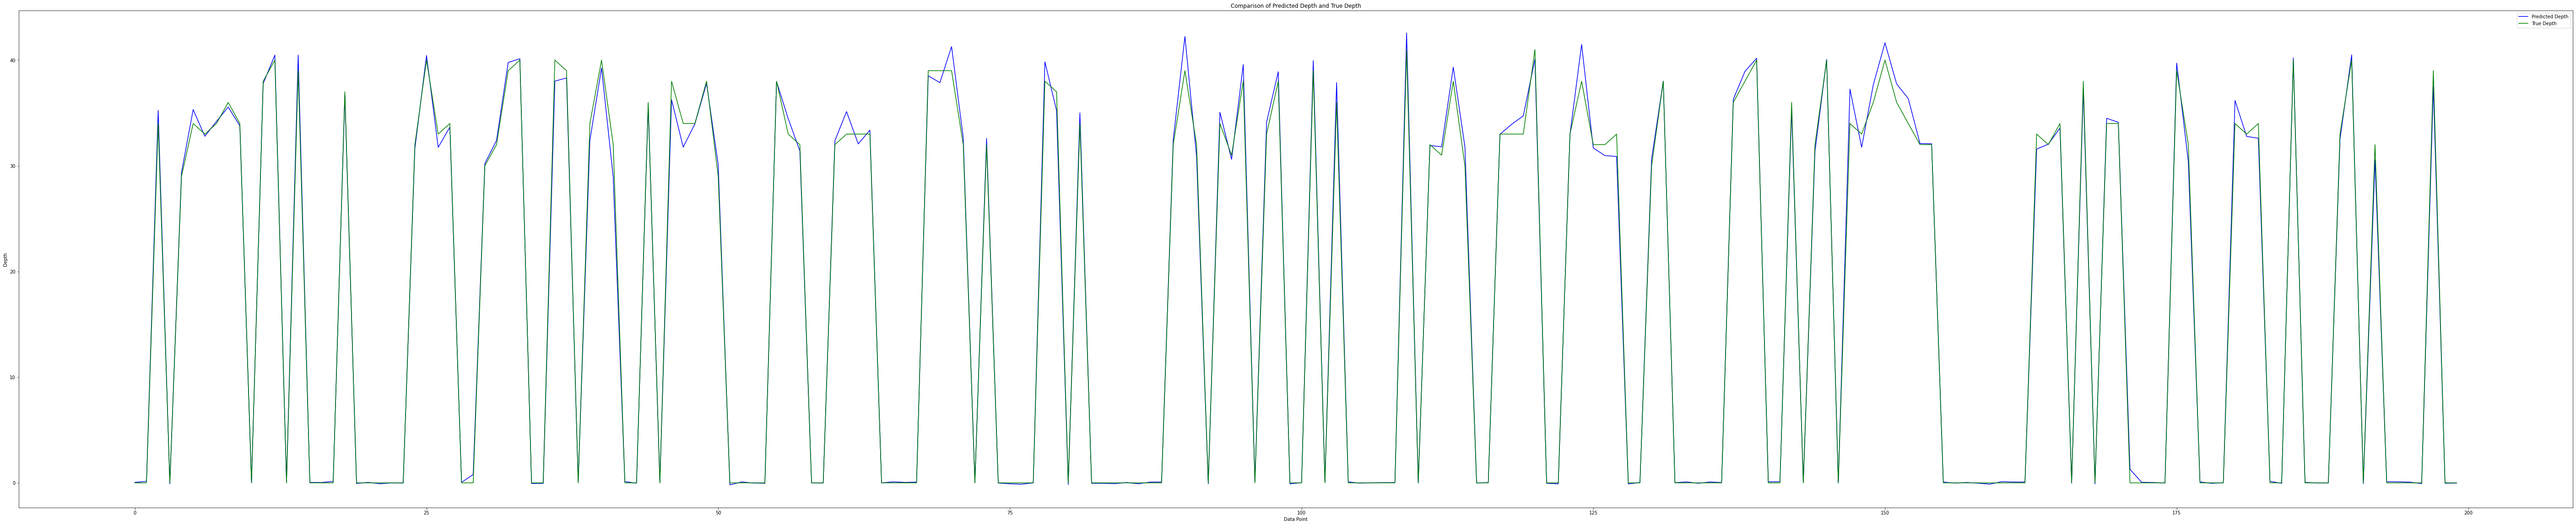

In [32]:
import matplotlib.pyplot as plt

# Define the figure size
plt.figure(figsize=(100, 20))

# Plot the predicted depth with a blue color and label it as 'Predicted Depth'
plt.plot(predicted_depth[:200], color='blue', label='Predicted Depth')

# Plot the true depth with a green color and label it as 'True Depth'
plt.plot(true_depth[:200], color='green', label='True Depth')

# Add labels for the x-axis and y-axis
plt.xlabel('Data Point')
plt.ylabel('Depth')

# Add a title to the plot
plt.title('Comparison of Predicted Depth and True Depth')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()


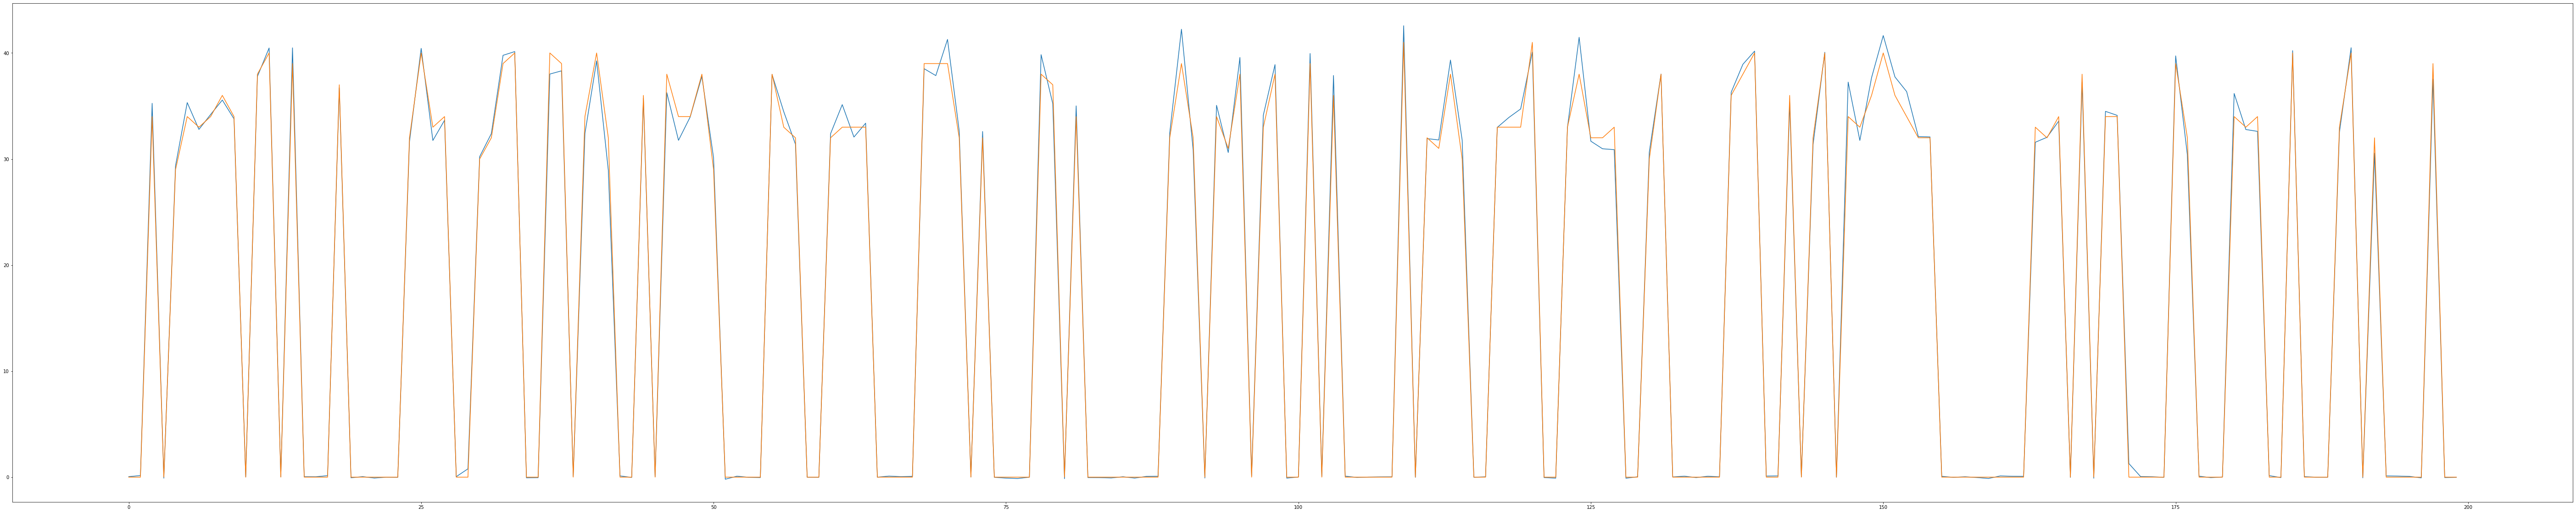

In [33]:
plt.figure(figsize=(100, 20))
plt.plot(predicted_depth[:200])
plt.plot(true_depth[:200])

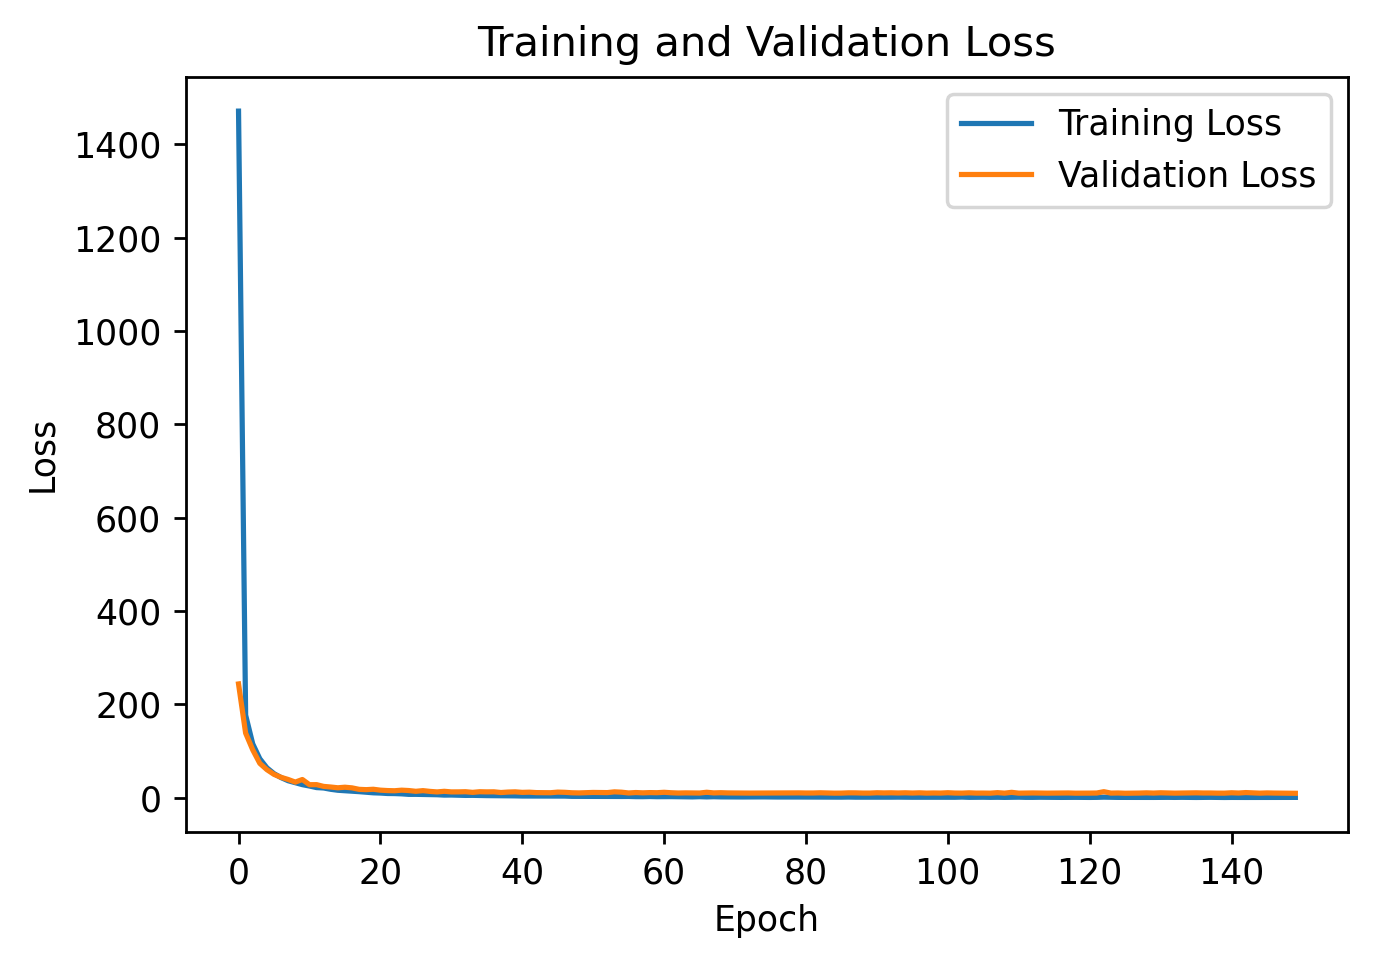

In [34]:
# Get the training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss with adjusted DPI
plt.figure(dpi=250)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
